# Part 1 - Exploratory Data Analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute
time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
logins = pd.read_json('logins.json')

In [3]:
#inspect dataframe - first 5 entries
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
#last entry
logins['login_time'][93141]

Timestamp('1970-04-13 18:54:23')

In [6]:
#set timestamp as index and add a column with a 1 value for each login
logins.set_index('login_time', inplace=True)
logins['count'] = 1
logins.head()

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [7]:
#resample and aggregate the columns in groups of 15-minute intervals
logins_agg15 = logins.resample('15min').sum()

In [8]:
#check result
logins_agg15.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [9]:
logins_agg15.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   9788 non-null   int64
dtypes: int64(1)
memory usage: 152.9 KB


The login times span from 1/1/1970 at 8pm to 4/13/1970 at 6:45pm. There are 9788 rows, timestamps sampled every 15 minutes, with integer values in the 'count' column.

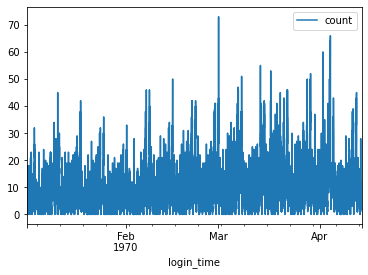

In [10]:
logins_agg15.plot()
plt.show()

This initial plot of the data doesn't show much of interest, besides that there might be weekly peaks in login activity that we can further investigate.

In [11]:
datetime.datetime(1970, 1, 1).weekday()

3

This output indicates that January 1, 1970 was a Thursday. The first Sunday of the dataset would thus be January 4.

In [12]:
#verify
datetime.datetime(1970, 1, 4).weekday()

6

Starting with Sunday, 1/4/70, we will create a plot of a 4-week cycle and see if any patterns become more clear.

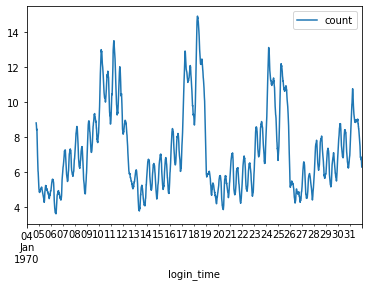

In [13]:
logins_agg15.loc['1970-01-04':'1970-01-31'].rolling(window=75).mean().plot()
plt.show()

This plot shows clear weekend spikes, as we noticed in the graph of the whole dataset. It also indicates there might be some cyclical nature to login time/count each day. We can get even more granular to check this out - cutting the window down to just one week.

February 1 was a Sunday. This means that March 1 will be a Sunday. We will look into the first week of March, with the double purpose of starting on a Sunday and inspecting some data we haven't gotten a close look at yet.

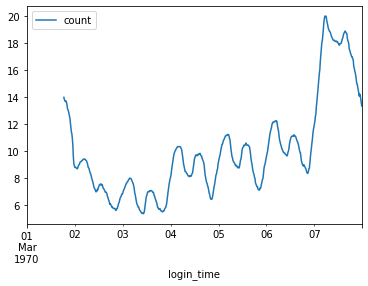

In [14]:
logins_agg15.loc['1970-03-01':'1970-03-07'].rolling(window=75).mean().plot()
plt.show()

This plot of a week in March matches with what we observed about the logins from February. There are significant spikes on the weekends, as well as cyclical usage throughout eat day depending on time of day. It seems that the highest usage times are late night (midnight) and midday (noon or so), with low points in the evenings and early mornings.

We will keep zooming in and look at individual 48-hour periods in April, along with the other three months, to see if the pattern observed in January, February, and March holds up.

In [15]:
datetime.datetime(1970, 4, 8).weekday()

2

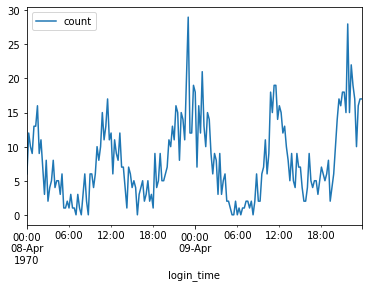

In [16]:
#a randomly selected 48-hour weekday period in April - Wednesday-Thursday
logins_agg15.loc['1970-04-08':'1970-04-09'].plot()
plt.show()

In [17]:
datetime.datetime(1970, 3, 15).weekday()

6

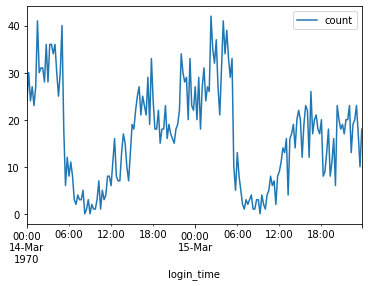

In [18]:
#a randomly selected 48-hour weekend period in March - Saturday-Sunday
logins_agg15.loc['1970-03-14':'1970-03-15'].plot()
plt.show()

In [19]:
datetime.datetime(1970, 2, 24).weekday()

1

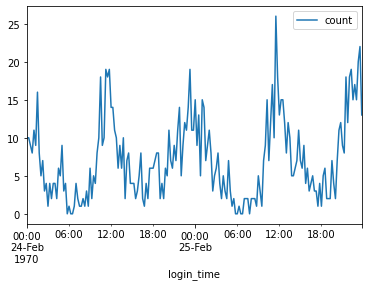

In [20]:
#a randomly selected 48-hour weekday period in February - Tuesday-Wednesday
logins_agg15.loc['1970-02-24':'1970-02-25'].plot()
plt.show()

In [21]:
datetime.datetime(1970, 1, 18).weekday()

6

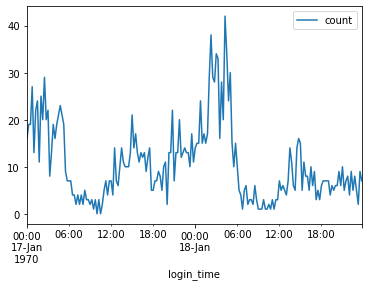

In [22]:
#a randomly selected 48-hour weekend period in January - Saturday-Sunday
logins_agg15.loc['1970-01-17':'1970-01-18'].plot()
plt.show()

The four graphs above show 48-hour weekend periods in January and March and 48-hour weekday periods in February and April.

Based on all of the above visualizations, we can make a few generalizations about the data and its patterns:
1. Usage (number of logins) is cyclical in nature on a weekly basis - it is significantly higher on the weekends than it is on the weekdays.
2. Usage (number of logins) is also cyclical in nature on a daily basis - it is typically highest late at night (around midnight) and in the middle of the day (around noon) and lowest in the early mornings and evenings.
3. Usage is more consistently predictable on weekdays than it is on weekends. The pattern observed in #2 above holds, but is less stark.

# Part 2 ‐ Experiment and Metrics Design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.

1) What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?


   As a business, Ultimate most likely considers profit/revenue as its main indicator of success. In order to maximize their revenue across both cities, Ultimate will want to ensure that each city has enough drivers available, but not too many. As with other rideshare options, if there are more drivers available than people who need to be driven, price per ride or unit of distance will decrease, as well as vice versa; if there are too few drivers available for the people who need to be driven, price per ride or unit of distance will increase. For example, if too many drivers are "stuck" in Gotham with not enough riders, and too few drivers are "stuck" in Metropolis with too many riders, and they don't wish to cross because of the tolls, Ultimate is losing potential revenue. Ultimate needs to achieve a balanced cost for their service in both cities, with enough drivers and enough riders in each. In order to convince drivers to cross the bridge and facilitate this balance, it might be worth Ultimate reimbursing all toll fees. Instead of drivers having to worry about making up the cost of tolls from their wages, they will think only about getting to the "right" side depending upon the ridership demand in each city.

   In order to determine whether this experiment has been a success once implemented, Ultimate could either compare driver willingness to cross the bridge to meet ridership demand (cross volume/driver-city exclusivity percentages before the tolls were paid versus after) or simply analyze their profit margin for the experiement time period versus a comparable time period before the change.

2) Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a) how you will implement the experiment
b) what statistical test(s) you will conduct to verify the significance of the
observation
c) how you would interpret the results and provide recommendations to the city
operations team along with any caveats

   The experiment could be implemented by Ultimate setting a time period to fully reimburse drivers' tolls when they cross the bridge. Before doing this, Ultimate must compile solid and complete data about their costs, revenue, driver locations, ridership, costs per units of distance in each city, etc. in the time period when drivers are responsible for paying the tolls themselves. This is the control for the experiment (and the measurement basis of the null hypothesis).
    
   The statistical test Ultimate can use to determine whether the experiment has been a success is a hypothesis test with, as stated above, the null hypothesis that paying for drivers' tolls does not create a statistically significant change to the volume of bridge crossing (and, as an extension, the potential profit margin of the company). 
    
   If the p-value is below a set threshold, typically 0.05 or 0.01, the null hypothesis does not hold and the company can comfortably make the assumption that the change has been beneficial. This particular experiment would determine whether or not drivers are crossing more because of their tolls being covered. If the null hypothesis is not rejected, the company should stop paying tolls at least temporarily, consider this particular experiment concluded, and start brainstorming a new idea to address the problem. If the null hypothesis is rejected (driver behavior IS affected by the change), Ultimate would then need to perform further analysis of the effect on their key measure of success: profit. If the drivers are crossing more, it naturally follows that Ultimate's costs of doing business will increase as they must pay tolls. It is possible that this will be covered by the revenue generated by the increased number of rides, but not guaranteed. A "successful" outcome of rejecting the null hypothesis in this experiment of paying tolls to increase driver crossings would thus necessitate further study as opposed to being a final result and an imperative to make the change permanent.

# Part 3 - Predictive Modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in
their 6th month on the system. Discuss why you chose your approach, what alternatives
you considered, and any concerns you have. How valid is your model? Include any key
indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long term rider retention (again, a few sentences will suffice).

In [23]:
riders = pd.read_json('ultimate_data_challenge.json')

In [24]:
riders.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [25]:
riders.shape

(50000, 12)

In [26]:
riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [27]:
riders.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [28]:
#signup_date and last_trip_date are string objects, they should be datetime
riders.signup_date = pd.to_datetime(riders.signup_date)
riders.last_trip_date = pd.to_datetime(riders.last_trip_date)

In [29]:
#check that it worked
riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [30]:
riders.last_trip_date.describe()

/var/folders/hx/8sm9nrmx43gb93j_zrztlbjw0000gn/T/ipykernel_35840/2046956131.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  riders.last_trip_date.describe()


count                   50000
unique                    182
top       2014-06-29 00:00:00
freq                     2036
first     2014-01-01 00:00:00
last      2014-07-01 00:00:00
Name: last_trip_date, dtype: object

Because the last last_trip_date value was midnight on the first day of July, I am making the assumption that the data was pulled on that day and that we are interested in capturing the riders who took rides within the 30 days before the download - June 1-30. These riders will be defined as the fraction who were "retained" by the company, while riders who did not ride take any trips in June were "not retained".

In [31]:
retained = riders.last_trip_date >= '2014-06-01'

#visualize the output boolean
print(retained)

0         True
1        False
2        False
3         True
4        False
         ...  
49995     True
49996    False
49997    False
49998    False
49999    False
Name: last_trip_date, Length: 50000, dtype: bool


In [32]:
yes_retained = retained.sum()
yes_no_retained = retained.count()

percent_retention = round(100 * (yes_retained / yes_no_retained),2)
percent_retention

37.61

The answer to Ultimate's first question, what percentage of riders were retained, is 37.61%.

The variable we are now most interested in finding explaining/finding correlations to is the "retained" variable we have just created. The next step is to assess the correlation of all the other variables to this new feature.

In [33]:
riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [34]:
#make boolean True/False 'ultimate_black_user' numeric
riders['ultimate_black_user'] = riders['ultimate_black_user'] * 1

In [35]:
#make datetime 'signup_date' and 'last_trip_date' numeric

#convert signup date to an integer indicating number of days past the first moment of 2014
riders['signup_date'] = riders.signup_date.dt.strftime('%Y%m%d').astype(int) - 20140100

#convert last trip date to an integer indicating number of days past the first moment of 2014
riders['last_trip_date'] = (riders.last_trip_date - min(riders.last_trip_date)).dt.days + 1

riders.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,25,4.7,1.10,168,iPhone,15.4,1,46.2,3.67,5.0
1,Astapor,0,29,5.0,1.00,125,Android,0.0,0,50.0,8.26,5.0
2,Astapor,3,6,4.3,1.00,7,iPhone,0.0,0,100.0,0.77,5.0
3,King's Landing,9,10,4.6,1.14,180,iPhone,20.0,1,80.0,2.36,4.9
4,Winterfell,14,27,4.4,1.19,74,Android,11.8,0,82.4,3.13,4.9


In [36]:
#'phone' and 'city' are both string objects that will need to be one-hot encoded
#based on the non-null count above, it looks like the phone column has a few nulls 
#that will need to be filled in before one-hot encoding
print(riders['phone'].value_counts())
print(riders['city'].value_counts())

iPhone     34582
Android    15022
Name: phone, dtype: int64
Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64


In [37]:
riders['phone'].fillna('Other', inplace=True)
riders['phone'].value_counts()

iPhone     34582
Android    15022
Other        396
Name: phone, dtype: int64

In [38]:
#one-hot encoding
onehot_phone = pd.get_dummies(riders['phone'])
onehot_city = pd.get_dummies(riders['city'])

In [39]:
onehot_phone.head()

,Android,Other,iPhone
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,1,0,0


In [40]:
onehot_city.head()

,Astapor,King's Landing,Winterfell
0,0,1,0
1,1,0,0
2,1,0,0
3,0,1,0
4,0,0,1


In [41]:
#join these two new dataframes to the original dataframe, then drop the original city and phone columns
riders = riders.join(onehot_city).join(onehot_phone)
riders.drop(['city','phone'], axis=1, inplace=True)

riders.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,Astapor,King's Landing,Winterfell,Android,Other,iPhone
0,4,25,4.7,1.10,168,15.4,1,46.2,3.67,5.0,0,1,0,0,0,1
1,0,29,5.0,1.00,125,0.0,0,50.0,8.26,5.0,1,0,0,1,0,0
2,3,6,4.3,1.00,7,0.0,0,100.0,0.77,5.0,1,0,0,0,0,1
3,9,10,4.6,1.14,180,20.0,1,80.0,2.36,4.9,0,1,0,0,0,1
4,14,27,4.4,1.19,74,11.8,0,82.4,3.13,4.9,0,0,1,1,0,0


In [42]:
#add rider retention to dataframe
riders['retained'] = retained
riders.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,Astapor,King's Landing,Winterfell,Android,Other,iPhone,retained
0,4,25,4.7,1.10,168,15.4,1,46.2,3.67,5.0,0,1,0,0,0,1,True
1,0,29,5.0,1.00,125,0.0,0,50.0,8.26,5.0,1,0,0,1,0,0,False
2,3,6,4.3,1.00,7,0.0,0,100.0,0.77,5.0,1,0,0,0,0,1,False
3,9,10,4.6,1.14,180,20.0,1,80.0,2.36,4.9,0,1,0,0,0,1,True
4,14,27,4.4,1.19,74,11.8,0,82.4,3.13,4.9,0,0,1,1,0,0,False


In [43]:
#'retained' is a boolean of True/False - make it numeric
riders['retained'] = riders['retained'] * 1
riders.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,Astapor,King's Landing,Winterfell,Android,Other,iPhone,retained
0,4,25,4.7,1.10,168,15.4,1,46.2,3.67,5.0,0,1,0,0,0,1,1
1,0,29,5.0,1.00,125,0.0,0,50.0,8.26,5.0,1,0,0,1,0,0,0
2,3,6,4.3,1.00,7,0.0,0,100.0,0.77,5.0,1,0,0,0,0,1,0
3,9,10,4.6,1.14,180,20.0,1,80.0,2.36,4.9,0,1,0,0,0,1,1
4,14,27,4.4,1.19,74,11.8,0,82.4,3.13,4.9,0,0,1,1,0,0,0


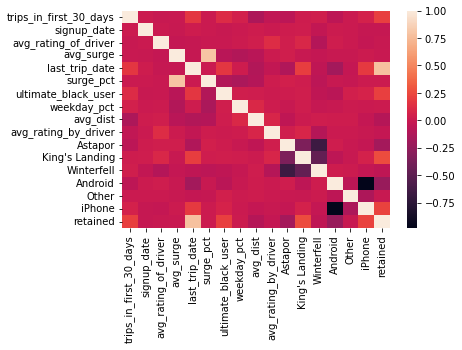

In [44]:
#all the variables are now numeric (with the exception of the dates) so we can make a correlation heatmap 
#and see if there are any strong correlations
import seaborn as sns

fig, ax = plt.figure(), plt.subplot()
corr = riders.corr()
ax = sns.heatmap(corr)
plt.show()

In [45]:
#check which variables are most strongly correlated with retention
corr['retained'].sort_values(ascending=False)

retained                  1.000000
last_trip_date            0.780837
King's Landing            0.262284
iPhone                    0.225244
trips_in_first_30_days    0.210463
ultimate_black_user       0.205002
surge_pct                 0.011797
weekday_pct               0.009693
avg_surge                -0.003333
Other                    -0.007419
avg_rating_of_driver     -0.011653
signup_date              -0.020211
avg_rating_by_driver     -0.026791
Winterfell               -0.046611
avg_dist                 -0.092780
Astapor                  -0.174655
Android                  -0.225464
Name: retained, dtype: float64

It appears that the variables most strongly correlated with rider retention are living in King's Landing, having an iPhone, number of trips taken in the first 30 days, and Ultimate Black User status. We ignore the high correlation between last trip date and the retention status because that is obvious and expected - we defined retention based on the last trip date. It is a good sanity check though.

Building a predictive model - this problem will require a predictive model to output a binary classification using categorical data (phones, cities) and numerical data (all the other columns) with 50,000 data points.

Some good potential options are logistic regression, random forest, and XGBoost. I will use a Logistic Regression model.

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

In [65]:
#drop rows with NaN values in order to allow the Logistic Regression model to work
riders = riders.dropna()

riders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41744 entries, 0 to 49998
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trips_in_first_30_days  41744 non-null  int64  
 1   signup_date             41744 non-null  int64  
 2   avg_rating_of_driver    41744 non-null  float64
 3   avg_surge               41744 non-null  float64
 4   last_trip_date          41744 non-null  int64  
 5   surge_pct               41744 non-null  float64
 6   ultimate_black_user     41744 non-null  int64  
 7   weekday_pct             41744 non-null  float64
 8   avg_dist                41744 non-null  float64
 9   avg_rating_by_driver    41744 non-null  float64
 10  Astapor                 41744 non-null  uint8  
 11  King's Landing          41744 non-null  uint8  
 12  Winterfell              41744 non-null  uint8  
 13  Android                 41744 non-null  uint8  
 14  Other                   41744 non-null

In [74]:
#define features for model - the chosen variables are positively correlated with retention
features = ["trips_in_first_30_days", "King's Landing", "iPhone", "ultimate_black_user", "surge_pct", "weekday_pct"]

X = riders[features]
y = riders['retained']

#split testing and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

In [76]:
#instantiate the model classifier and fit to training data
lr_clf = LogisticRegression(max_iter=500)

lr_clf.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [77]:
#predict y-labels using model/training data
y_pred_tr = lr_clf.predict(X_train)

In [78]:
training_score = accuracy_score(y_train, y_pred_tr)
training_score

0.7051334702258727

The model accuracy with the training data is 70.5%. Let's see how it does with the test set of data.

In [80]:
y_pred_te = lr_clf.predict(X_test)

testing_score = accuracy_score(y_test, y_pred_te)
testing_score

0.7014532098371128

Only slightly less accurate. The model isn't overfit to the training data.

Further analysis of the results:

In [85]:
#confusion matrix from the testing data
cm = confusion_matrix(y_test, y_pred_te, labels = lr_clf.classes_)
cm

array([[6039, 1303],
       [2436, 2746]])

In [88]:
#training data classification report
print(classification_report(y_train, y_pred_tr))

              precision    recall  f1-score   support

           0       0.72      0.83      0.77     17244
           1       0.68      0.53      0.60     11976

    accuracy                           0.71     29220
   macro avg       0.70      0.68      0.68     29220
weighted avg       0.70      0.71      0.70     29220



In [89]:
#testing data classification report
print(classification_report(y_test, y_pred_te))

              precision    recall  f1-score   support

           0       0.71      0.82      0.76      7342
           1       0.68      0.53      0.59      5182

    accuracy                           0.70     12524
   macro avg       0.70      0.68      0.68     12524
weighted avg       0.70      0.70      0.69     12524



These numbers aren't too bad. We can predict with 70% accuracy whether a rider will be retained or not using this model. I will also try using an XGBoost model to see if I can improve upon this predictive ability with a different model type. XGBoost is well suited to the data and memory efficient.

In [90]:
from xgboost import XGBClassifier, cv, plot_importance

xgb_clf = XGBClassifier(objective='binary:logistic', random_state=42, n_estimators=10, max_depth=8)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [91]:
xgb_y_pred = xgb_clf.predict(X_train)

xgb_training_score = accuracy_score(y_train, xgb_y_pred)
xgb_training_score

0.7854893908281999

This accuracy value is higher! The hyperparameters of this model also haven't been adjusted, so I can do a quick optimization using a Grid Search to see if I can improve the model accuracy even more.

In [93]:
#dictionary of parameters to optimize with range of optimization values
parameters = {
    'max_delta_step':[0,0.05],
    'scale_pos_weight':[0.95, 0.9],
    'subsample':[1,0.8],
    'learning_rate': [0.25, 0.2, 0.1],
    'min_child_weight':[0,1,2],
    'gamma':[1, 2, 3]
    }


#GridSearch
grid_search = GridSearchCV(param_grid=parameters, estimator=xgb_clf, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012...
                                     max_delta_step=0, max_depth=8,
                                     max_leaves=0, min_child_weight=1,
                                     missing=nan, monotone_constraints='()',
                                     n_estimators=10, n_jobs=0,
    

In [94]:
#print best parameters and results
print(grid_search.best_params_)
print(grid_search.best_score_)

{'gamma': 3, 'learning_rate': 0.25, 'max_delta_step': 0, 'min_child_weight': 0, 'scale_pos_weight': 0.95, 'subsample': 0.8}
0.7684120465434634


In [95]:
#optimized parameters
optimized_parameters = {'objective':'binary:logistic',
                        'n_estimators': 10,
                        'random_state': 42,
                        'subsample': 0.8, 
                        'scale_pos_weight': 0.95, 
                        'min_child_weight': 0, 
                        'max_depth': 8, 
                        'max_delta_step': 0, 
                        'learning_rate': 0.25, 
                        'gamma': 3
                       }

#instantiate and train new classifier with the optimized parameters
xgb_clf_opt = XGBClassifier(**optimized_parameters)
xgb_clf_opt.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=3, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.25, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=8, max_leaves=0, min_child_weight=0, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [96]:
xgb_y_pred_opt = xgb_clf_opt.predict(X_train)

xgb_opt_training_score = accuracy_score(y_train, xgb_y_pred_opt)
xgb_opt_training_score

0.7816906228610541

This is a slightly lower accuracy score than we achieved with the XGBoost model with unoptimized parameters.

Since these XGBoost accuracy scores are both using the training data and not the testing data, there's a chance that the unoptimized model is only better because it's slightly overfit to the training data. We will verify by checking on the testing data then decide on a final model.

In [98]:
#testing data with unoptimized XGB model
xgb_y_pred_test = xgb_clf.predict(X_test)

print(accuracy_score(y_test, xgb_y_pred_test))

0.7686841264771639


In [99]:
#testing data with optimized XGB model
xgb_y_pred_opt_test = xgb_clf_opt.predict(X_test)

print(accuracy_score(y_test, xgb_y_pred_opt_test))

0.7687639731715107


The numbers are only very slightly different. Ultimately, I'll go with the optimized model even though the result is only a tiny bit better. 

Further analysis:

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

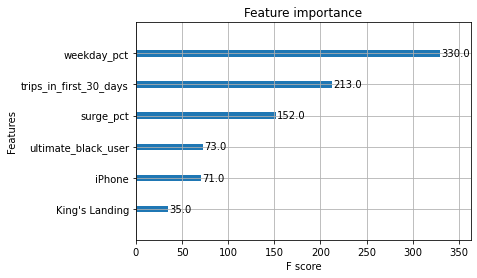

In [101]:
plot_importance(xgb_clf_opt)

Of the features analyzed, the ones more impactful on rider retention are percentage of trips taken on a weekday and number of trips taken in the first 30 days. I would recommend that Ultimate focus on the weekday rider group as their key opportunity for retention. These are likely people using the service to get to work on weekdays and will theoretically be easier to retain anyway as it is a necessity for them to make that journey.